In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [19, 8] 

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Regression

Regression Analysis is a predictive modelling technique.

Regression Analysis estimates the relationship between a dependent (target) variable and an independent (feature) variable.

## Linear Regression

Linear Regression models like Simple, Multiple, Polynomial are useful to predict continuous values.

## Logistic Regression

Logistic Regression models are used to predict categorical type of values.

Example:
* An email is a spam or not spam.
* The political party to which a citizen is going to vote.

The categorical data contains limited possibilities i.e., the data is classified into groups or classes.

Logistic Regression model is one of the techniques for classification.

When the categorical data shows only 2 possibilities, it is called Binary classification.

Example: Will the customer buy life insurance?

When the categorical data has more than 2 possibilities, it is called Multiclass classification.

Example: Identifying the written digit.

### Binary Classification using Logistic Regression

In Binary classification, we need to predict one of the two classes of the data.

Example: Depending on the age of the preson, predict whether the person will buy insurance or not.

### Case Study I

#### Depending on the age of the preson, predict whether the person will buy insurance or not.

##### Read the Data

In [4]:
insurance_df = pd.read_csv('../datasets/insurance_data.csv')

In [5]:
insurance_df.shape

(27, 2)

In [6]:
insurance_df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


age is the independent variable.

bought_insurance is the dependent variable having two values 0 and 1: 0 represents NO and 1 represents YES.

##### Data Visualization

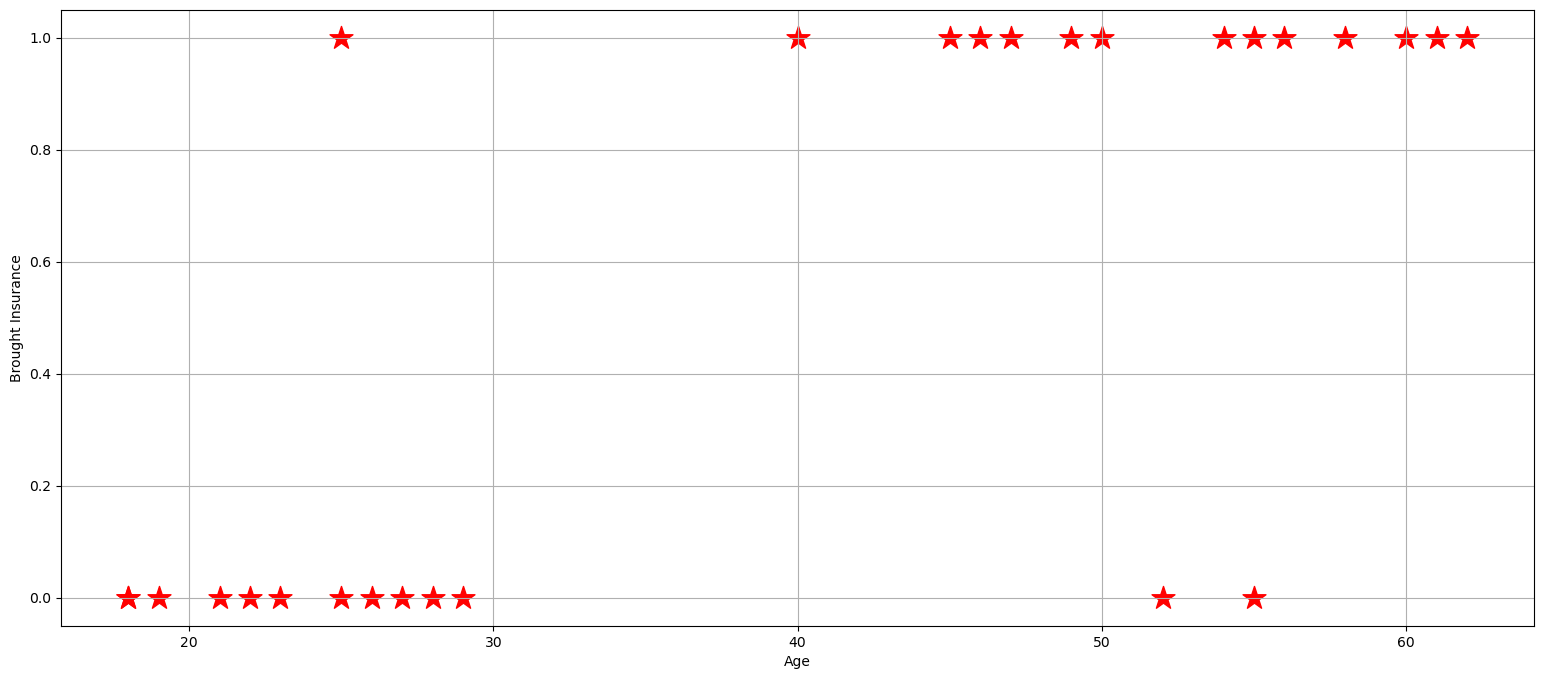

In [7]:
plt.scatter(data=insurance_df, x='age', y='bought_insurance', marker='*', s=300, color='r')
plt.grid()
plt.xlabel('Age')
plt.ylabel('Brought Insurance')
plt.show()

Since bought_insurance has only two values 0 and 1, the data points will be either at the bootom (0) or top (1).

If a straight line is drawn, connecting the data points as in Linear Regression, the points will not fit on the line properly.

Most of the data points will be outside of the line.

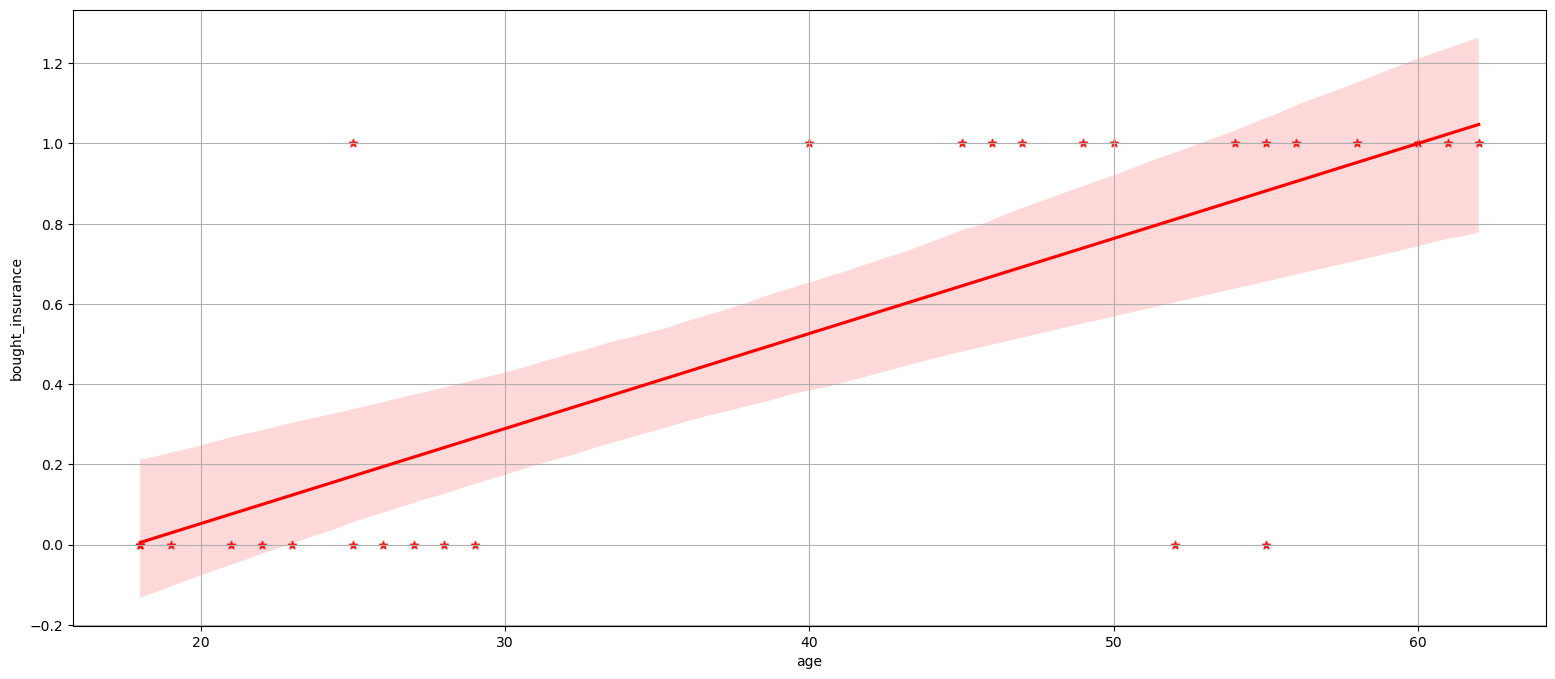

In [8]:
sns.regplot(data=insurance_df, x='age', y='bought_insurance', marker='*', color='r')
plt.grid()
plt.show()

The data points can be well connected using a S shaped curve.

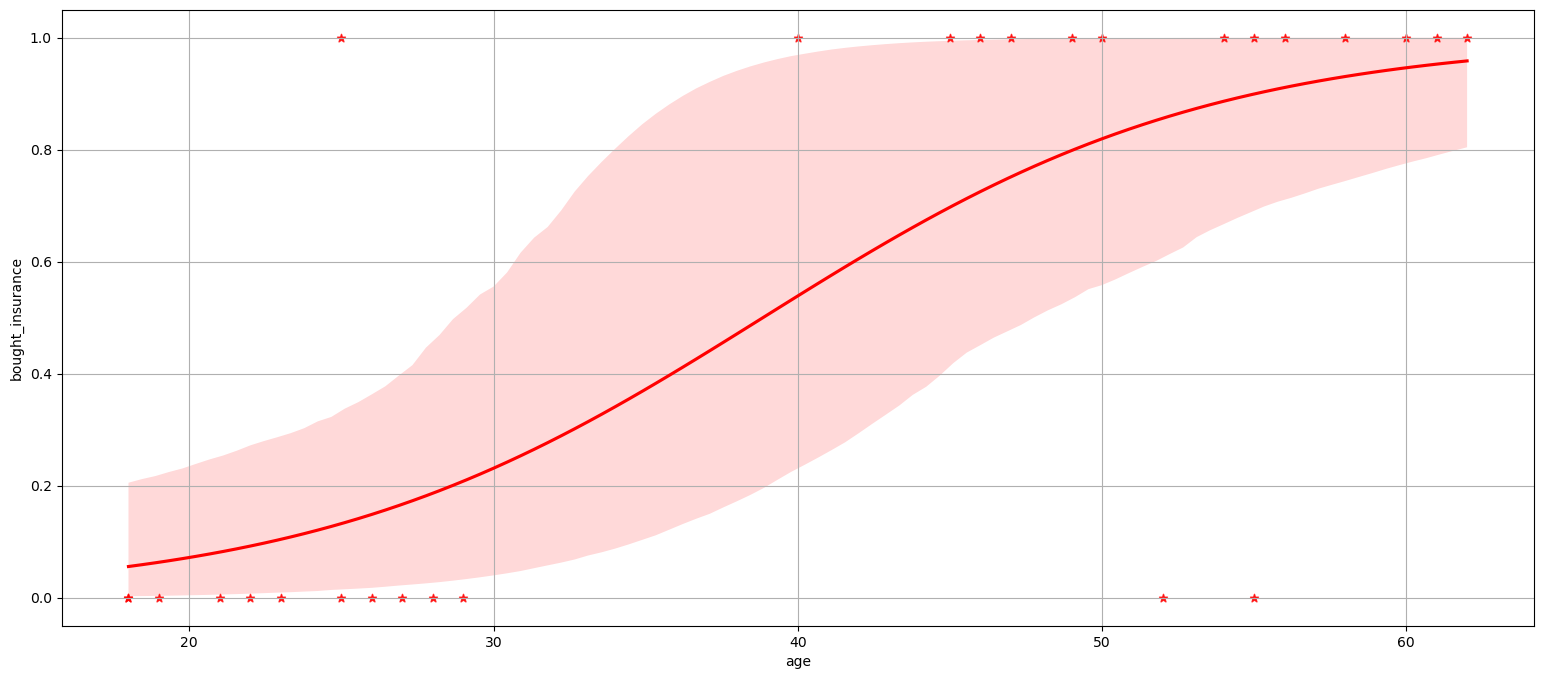

In [9]:
sns.regplot(data=insurance_df, x='age', y='bought_insurance', logistic=True, marker='*', color='r')
plt.grid()
plt.show()

The S shaped curve is drawn using the Sigmoid or Logit function, given by the formula: $ sigmoid(x) = 1/(1 + e^{-x}) $, where e is the Euler's number that is nearly equal to 2.71828.

In the above equation, 1 is divided by some quantity. Hence the equaltion can return the maximum value up to 1 only.

So, the Sigmoid function can convert the input in the range from 0 and 1.

The Linear Regression equation is applied on the sigmoid function to get the equation for the Logistic Regression.

The equation of the Logic Regression: $ y = 1 / 1 + e ^ {-(m * x + c)}$ .

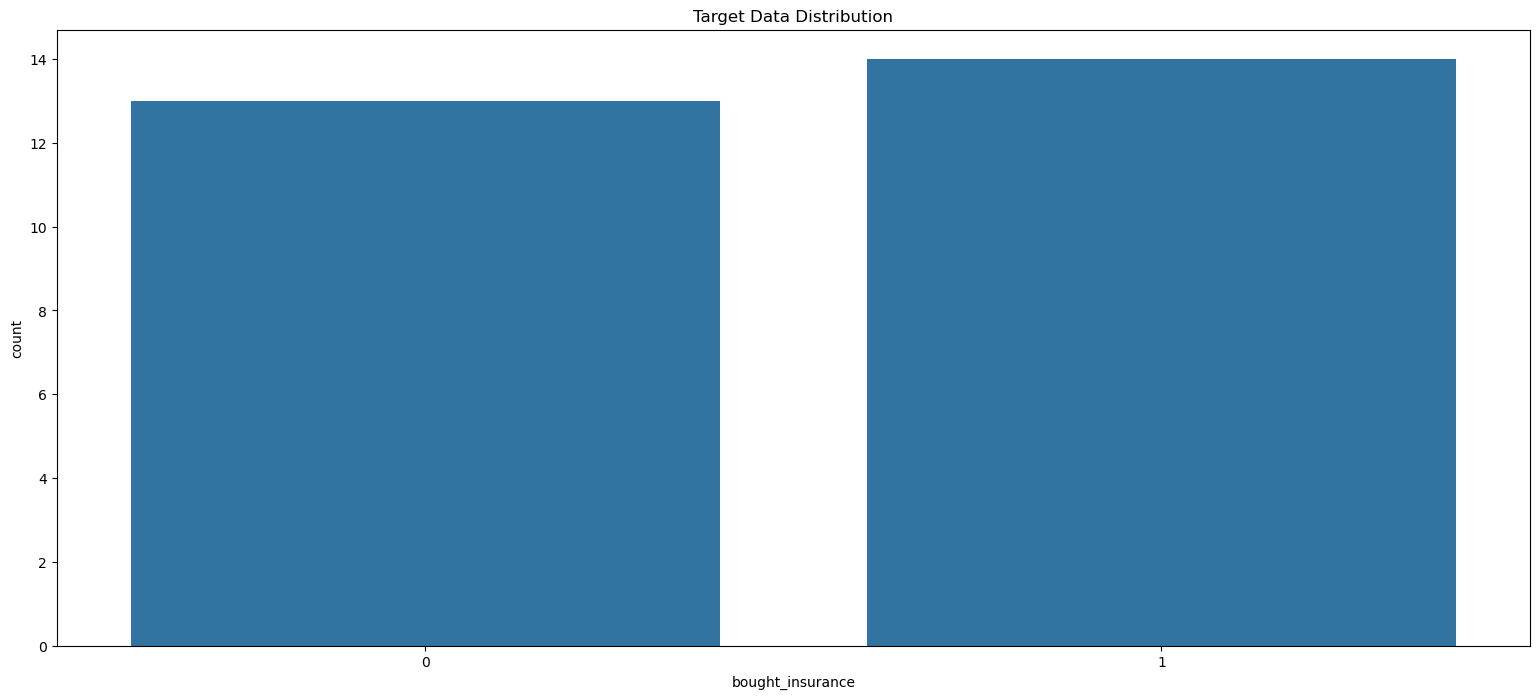

In [10]:
sns.countplot(data=insurance_df, x='bought_insurance')

plt.title('Target Data Distribution')

plt.show()

##### Retrieve the independent and dependent variables

In [11]:
X = insurance_df['age'].values.reshape(-1, 1)

y = insurance_df['bought_insurance'].values.reshape(-1, 1)

##### Split the data into train and test

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

##### Model Training

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logit_model = LogisticRegression()

In [16]:
logit_model.fit(X_train, y_train)

LogisticRegression()

##### Model Evaluation

In [17]:
logit_model.score(X_train, y_train)

0.9047619047619048

In [18]:
logit_model.score(X_test, y_test)

0.8333333333333334

##### Prediction

In [19]:
X_test

array([[58],
       [49],
       [19],
       [52],
       [45],
       [18]], dtype=int64)

In [20]:
y_test

array([[1],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int64)

In [21]:
y_predict = logit_model.predict(X_test)

y_predict

array([1, 1, 0, 1, 1, 0], dtype=int64)

In [22]:
logit_model.predict_proba(X_test)

array([[0.04795745, 0.95204255],
       [0.15806064, 0.84193936],
       [0.93775974, 0.06224026],
       [0.10800805, 0.89199195],
       [0.25198884, 0.74801116],
       [0.9457649 , 0.0542351 ]])

In [23]:
logit_model.predict([[36]])

array([0], dtype=int64)

Don't buy the insurance.

In [24]:
logit_model.predict([[63]])

array([1], dtype=int64)

Buy the insurance.

### Confusion Matrix

During the process of Machine Learning, the origianl data is divided into 2 parts: train data and test data.

The train data is useful to train the model. 

During training, the model understands the relation between the features (columns) of the data.

During testing, the model is provided with the test data to check how the model perfroms with the new data.

The Machine Learning model is evaluated by comparing its performance during traing and testing. 

The evaluation can be shown using a confusion matrix.

A confusion matrix is a table of data that summarizes the performance of a Machine Learning model.

Genrally, confusion matrix is created to evaluate the performance of a classification model.

Confusion matrix helps to figure out the misclassified cases.

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix = confusion_matrix(y_test, y_predict)

confusion_matrix

array([[2, 1],
       [0, 3]], dtype=int64)

In [27]:
print('Test Data:', y_test.reshape(-1, ))

print('Predicted:',y_predict)

Test Data: [1 1 0 0 1 0]
Predicted: [1 1 0 1 1 0]


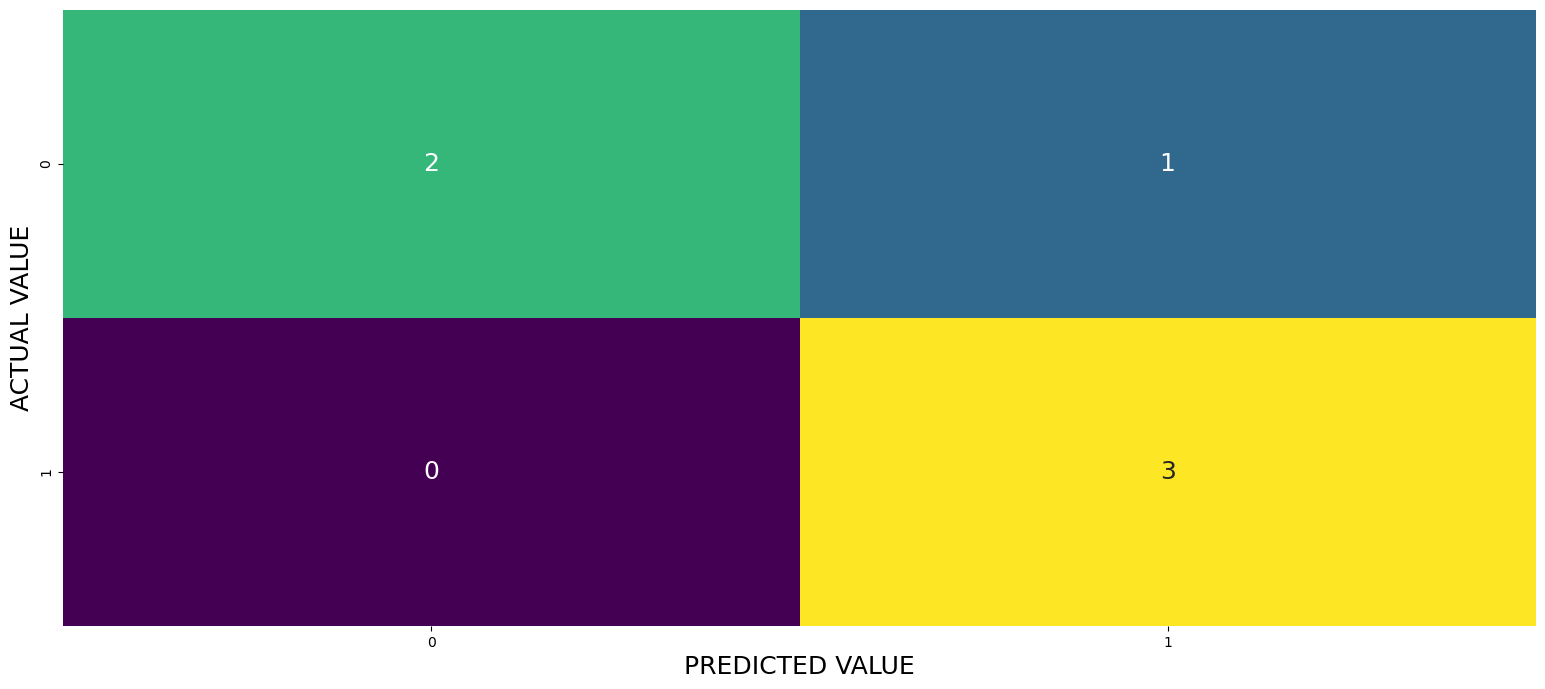

In [28]:
sns.heatmap(confusion_matrix, annot=True, cbar=False, cmap='viridis', annot_kws={"fontsize":18})
#sns.set(font_scale=2) 
plt.xlabel('PREDICTED VALUE', fontsize=18)
plt.ylabel('ACTUAL VALUE', fontsize=18)
plt.show()

1. **True Positive (TP):** Predicted the class as positive and it is true.

2. **True Negative (TN):** Predicted the class as negative and it is true.

3. **False Positive (FP):** Predicted the class as positive and it is false. Also known as a Type I error.

4. **False Negative (FN):** Predicted the class as negative and it is false. Also known as a Type II error.

#### Matrics in Confusion Matrix

1. **Accuracy**

Accuracy is used to measure the performance of the model. 

Accuracy indicates the number of classes predicted correctly. 

Accuracy is the ratio of Total correct instances to the total instances. 

Accuracy = (TP + TN)/(TP + TN + FP + FN)

Accuracy should be high as possible.

2. **Precision**

Precision is a measure of how accurate a model’s positive predictions are. 

Precision indicates from all the classes we have predicted as positive, how many are actually positive.

Precision is defined as the ratio of true positive predictions to the total number of positive predictions made by the model.

Precision = TP/(TP + FP)

Precision should be high as possible.

3. **Recall**

Recall indicates from all the positive classes, how many we predicted correctly.

Recall = TP/(TP +FN)

Recall should be high as possible.

4. **F1-Score**

F1-score is used to evaluate the overall performance of a classification model.

F1-score is the harmonic mean of precision and recall.

F1-score = (2 X Precision X Recall)/(Recall + Precision)

5. **Specificity**

Specificity measures the ability of a model to correctly identify negative instances.

Specificity is also known as the True Negative Rate.

Specificity = TN/(TN + FP)

### Case Study II

#### Heart Disease Prediction

##### Read the dataset

In [29]:
heart_df = pd.read_csv('../datasets/Heart.csv')

##### Data Dimension

In [30]:
heart_df.shape

(303, 15)

##### Display top 5 rows

In [31]:
heart_df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##### Details of the Dataset

In [32]:
pd.DataFrame({
    'Column': ['age', 
               'sex', 
               'cp',
               'trestbps',
               'chol',
               'fbs',
               'restecg',
               'thalach',
               'exang',
               'oldpeak',
               'slope',
               'ca',
               'thal',
               'target'
              ],
    'Description':['age in years', 
                   '(1 = male; 0 = female)',
                     'chest pain type',
                   'resting blood pressure (in mm Hg on admission to the hospital)',
                   'serum cholestoral in mg/dl',
                   '(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)',
                   'resting electrocardiographic results',
                   'maximum heart rate achieved',
                   'exercise induced angina (1 = yes; 0 = no)',
                   'ST depression induced by exercise relative to rest',
                   'the slope of the peak exercise ST segment',
                   'number of major vessels (0-3) colored by flourosopy',
                   '0 = normal; 1 = fixed defect; 2 = reversable defect',
                   '1 or 0'
                  ]

})

,Column,Description
0,age,age in years
1,sex,(1 = male; 0 = female)
2,cp,chest pain type
3,trestbps,resting blood pressure (in mm Hg on admission ...
4,chol,serum cholestoral in mg/dl
5,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
6,restecg,resting electrocardiographic results
7,thalach,maximum heart rate achieved
8,exang,exercise induced angina (1 = yes; 0 = no)
9,oldpeak,ST depression induced by exercise relative to ...


##### Display Schema

In [33]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


##### Drop the not required column

In [34]:
heart_df.drop('Unnamed: 0', axis=1, inplace=True)

In [35]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


##### Statistical Information

In [36]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### Data Visualization

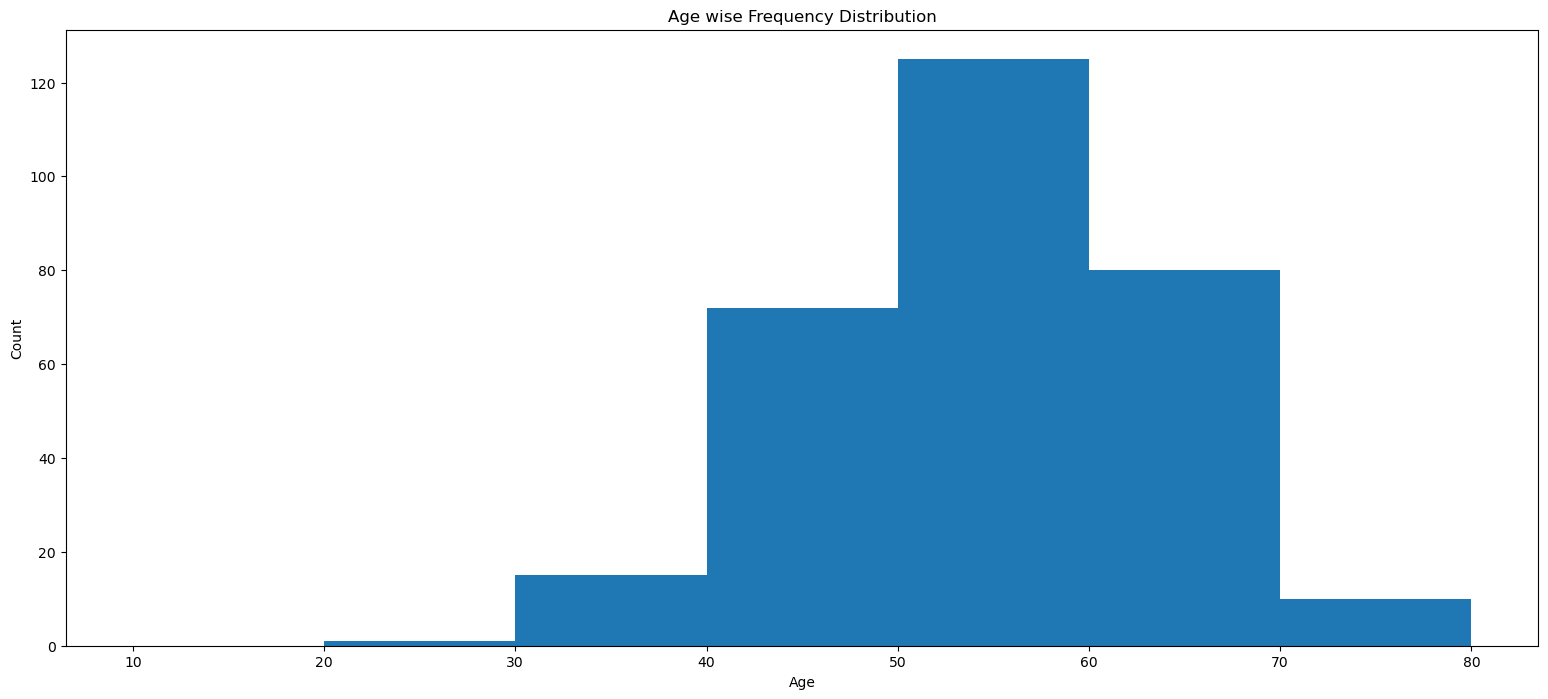

In [37]:
plt.hist(heart_df['age'], bins=[10, 20, 30, 40, 50, 60, 70, 80])
plt.title("Age wise Frequency Distribution")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

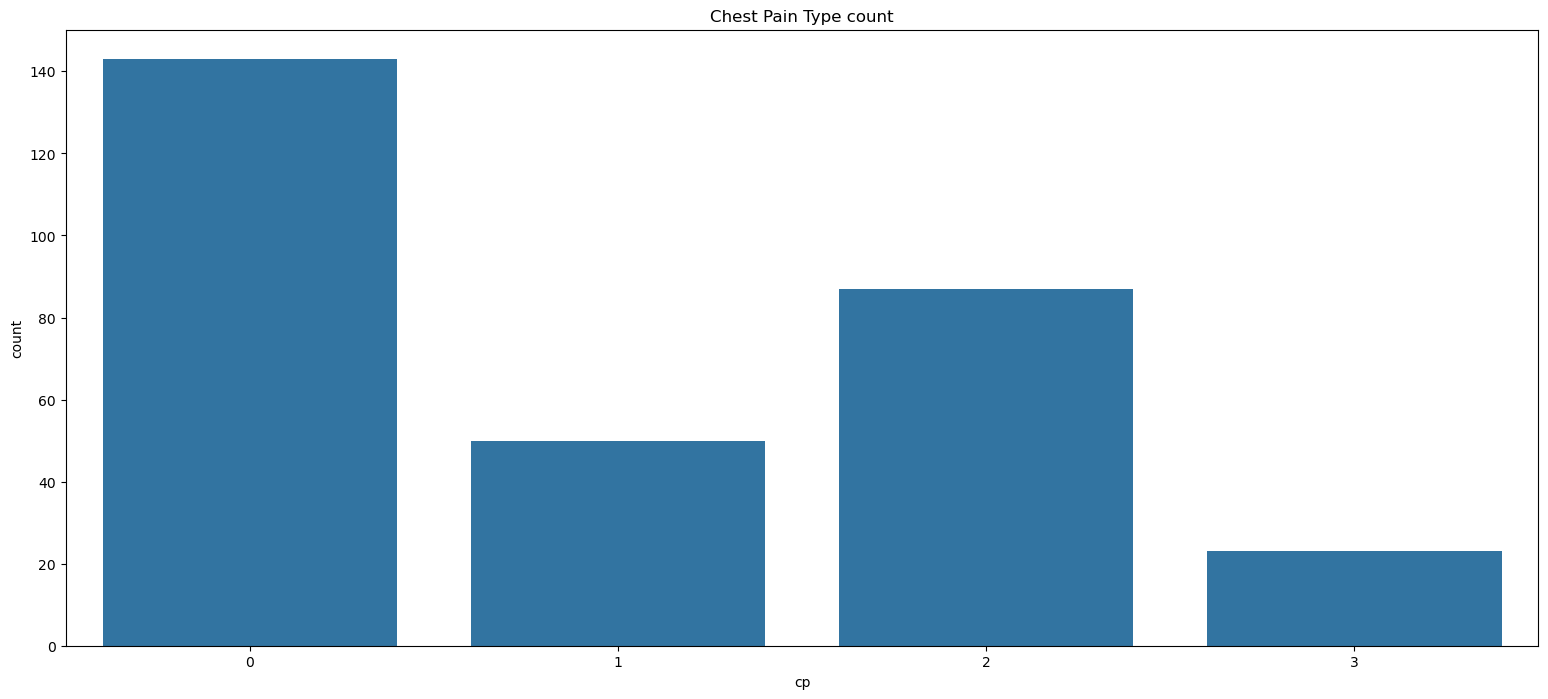

In [38]:
sns.countplot(data=heart_df, x='cp')
plt.title("Chest Pain Type count")
plt.show()

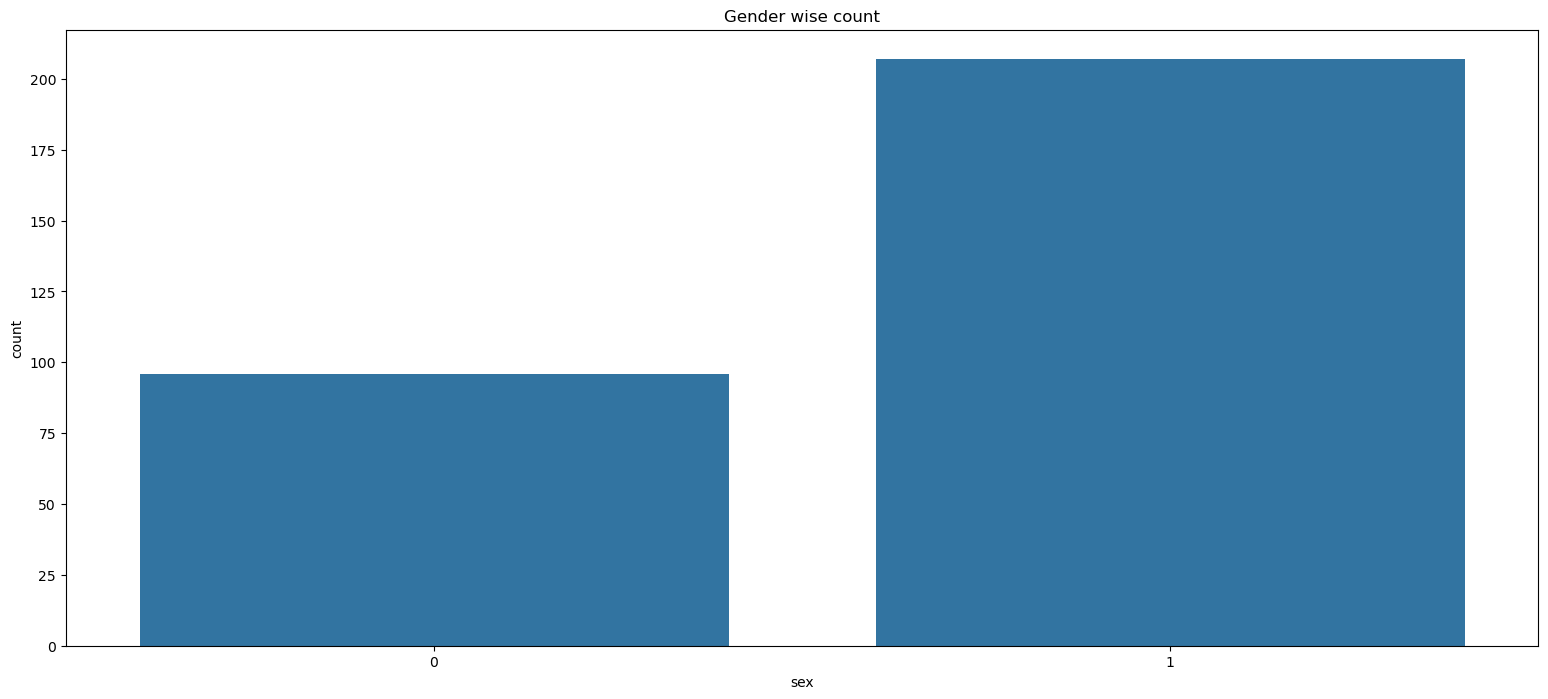

In [39]:
sns.countplot(data=heart_df, x='sex')
plt.title("Gender wise count")
plt.show()

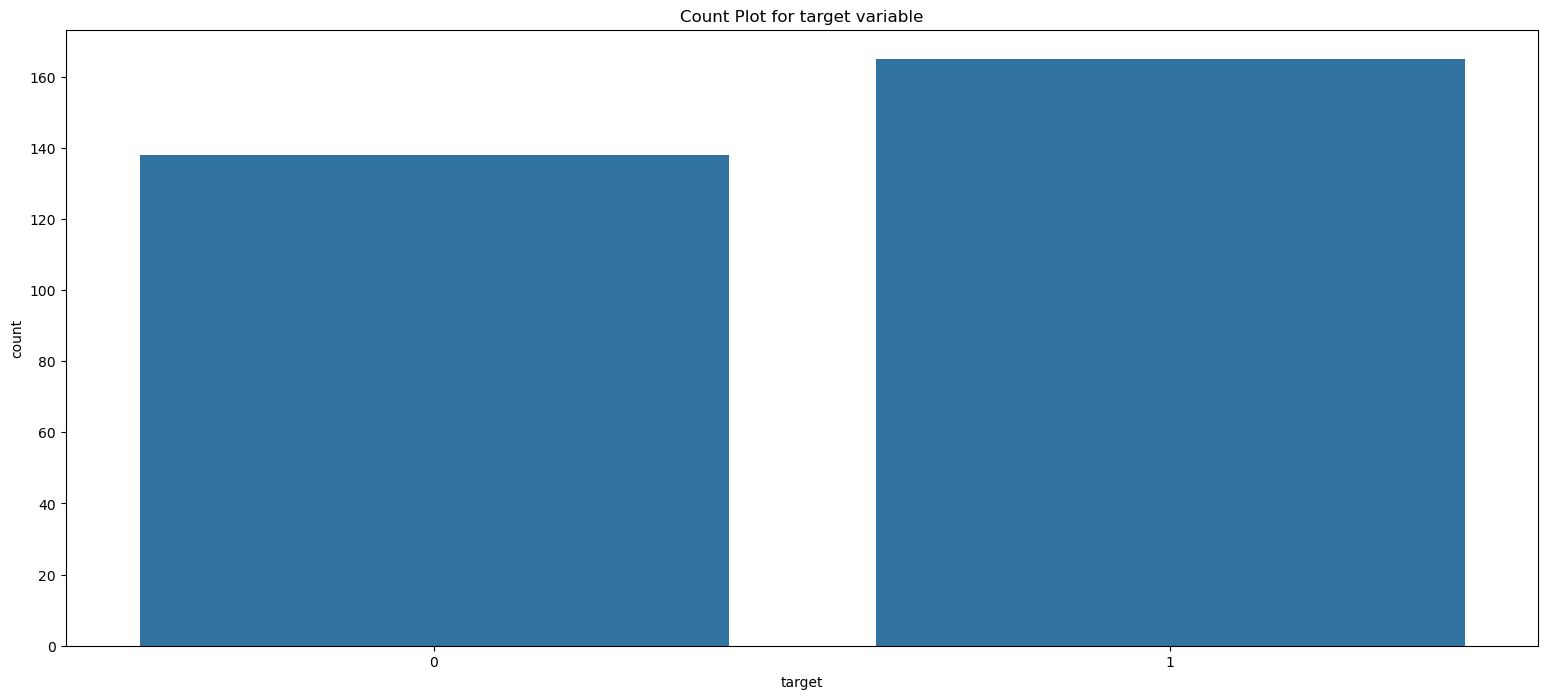

In [40]:
sns.countplot(data=heart_df, x='target')
plt.title("Count Plot for target variable")
plt.show()

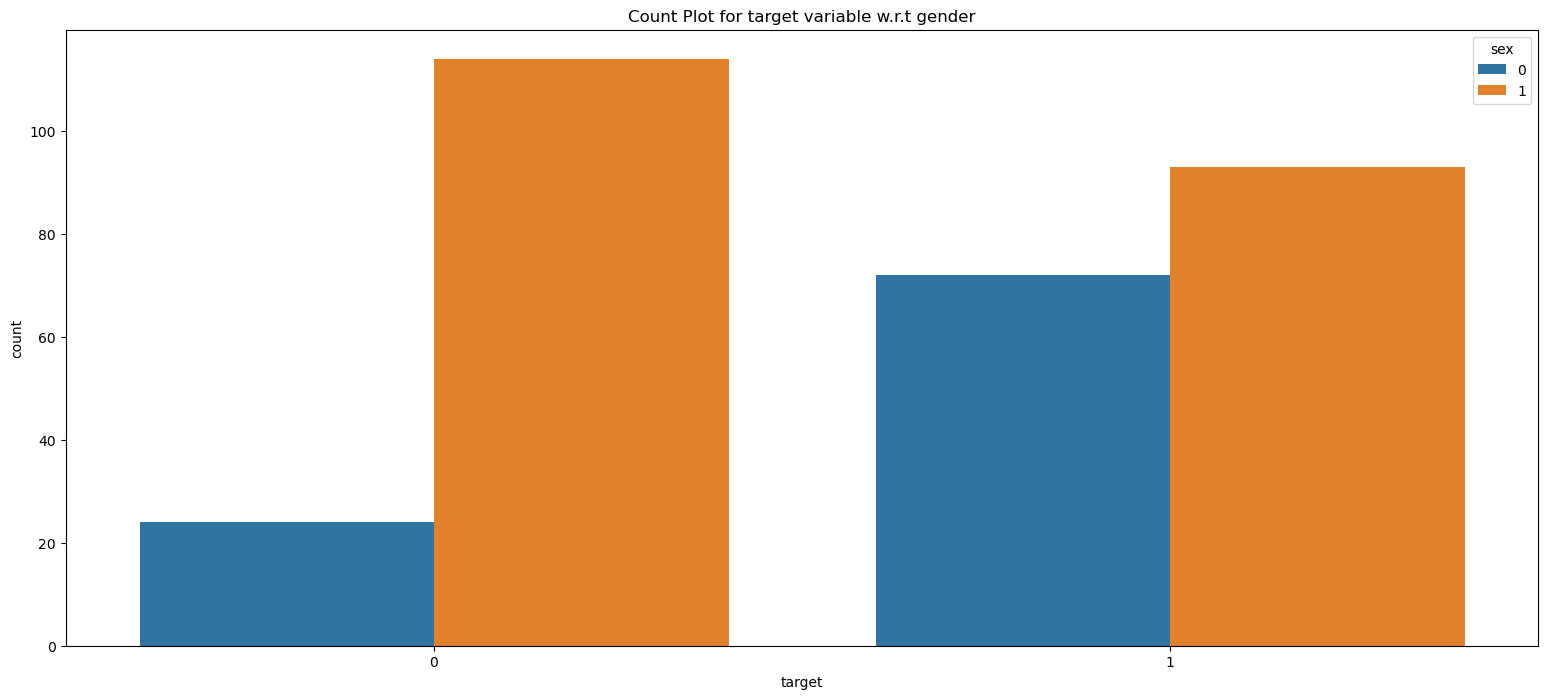

In [41]:
sns.countplot(data=heart_df, x='target', hue='sex')
plt.title("Count Plot for target variable w.r.t gender")
plt.show()

##### Check for Duplicate Rows

In [42]:
heart_df.duplicated().sum()

1

##### Drop Duplicate Rows

In [43]:
heart_df.drop_duplicates(inplace=True)

In [44]:
heart_df.shape

(302, 14)

##### Outlier Detection

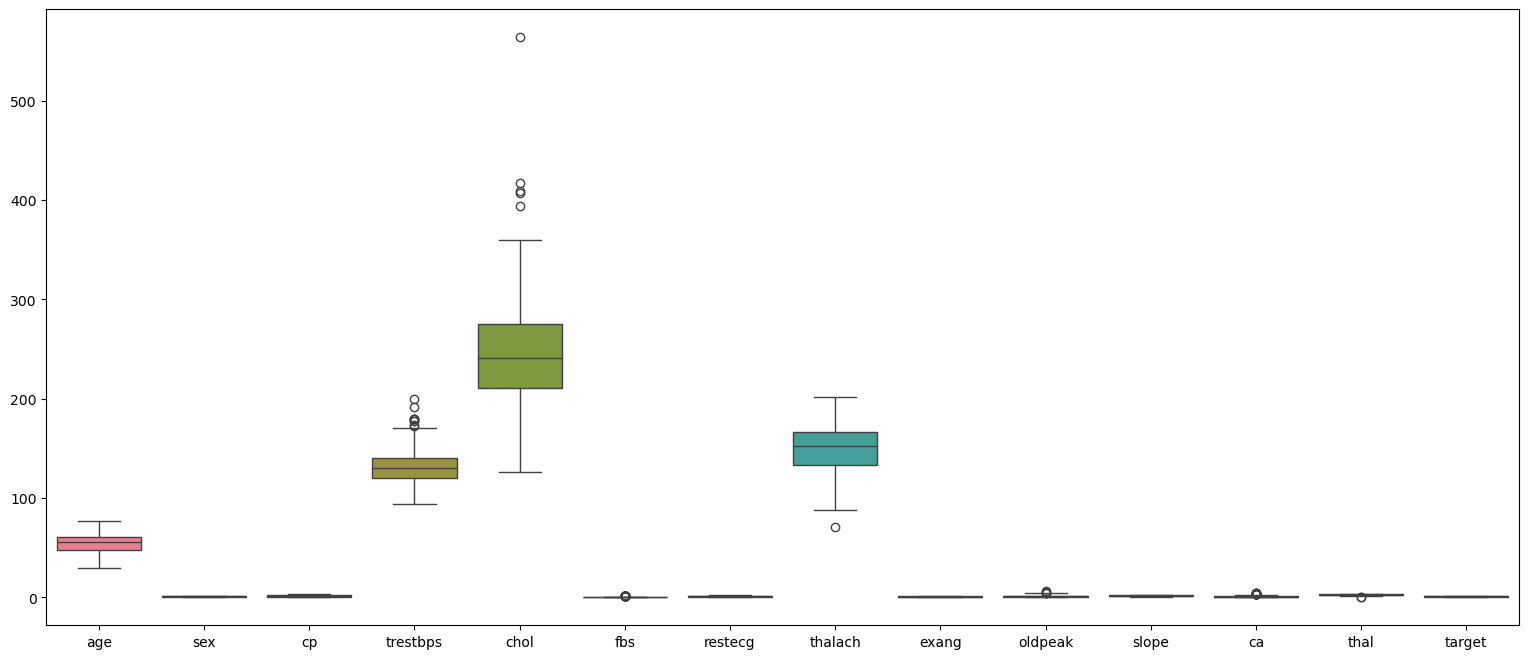

In [45]:
sns.boxplot(data=heart_df)

plt.show()

##### Outlier Treatment

In [46]:
# obtain the first quartile
Q1 = heart_df.quantile(0.25)

# obtain the third quartile
Q3 = heart_df.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

age         13.00
sex          1.00
cp           2.00
trestbps    20.00
chol        63.75
fbs          0.00
restecg      1.00
thalach     32.75
exang        1.00
oldpeak      1.60
slope        1.00
ca           1.00
thal         1.00
target       1.00
dtype: float64


In [47]:
ul = Q3 + 1.5 * IQR

ll = Q1 - 1.5 * IQR

In [48]:
heart_df = heart_df[~((heart_df < ll) |(heart_df > ul)).any(axis=1)]

In [49]:
heart_df.shape

(228, 14)

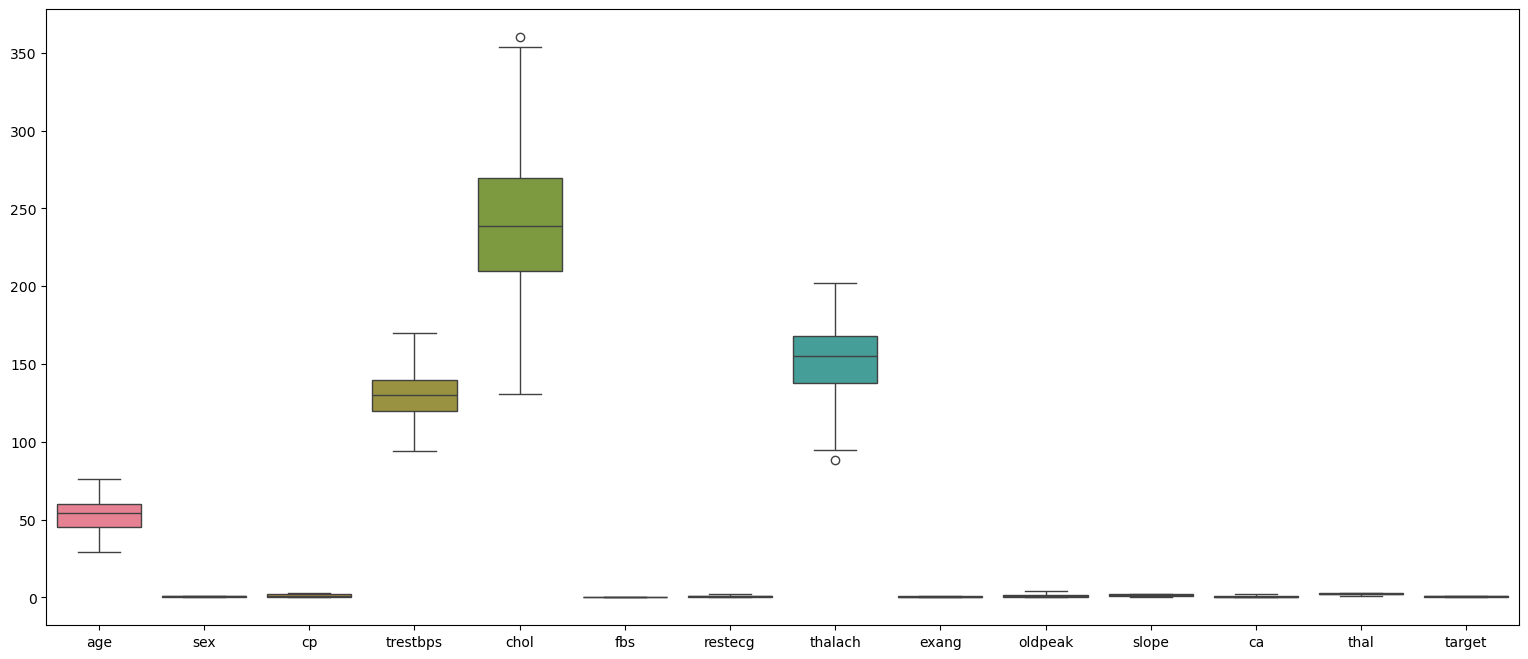

In [50]:
sns.boxplot(data=heart_df)

plt.show()

##### Extracting Feature and Target Variables

In [51]:
X = heart_df.drop('target', axis=1)

y = heart_df['target']

##### Data Normalization

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
X = scaler.fit_transform(X)

##### Split the Data into training and test

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

##### Model Training

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
logistic_model = LogisticRegression()

In [59]:
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [60]:
logistic_model.score(X_train, y_train)

0.8516483516483516

##### Model Evaluation

In [61]:
logistic_model.score(X_test, y_test)

0.8043478260869565

In [62]:
y_predict = logistic_model.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [64]:
confusion_matrix(y_test, y_predict)

array([[10,  4],
       [ 5, 27]], dtype=int64)

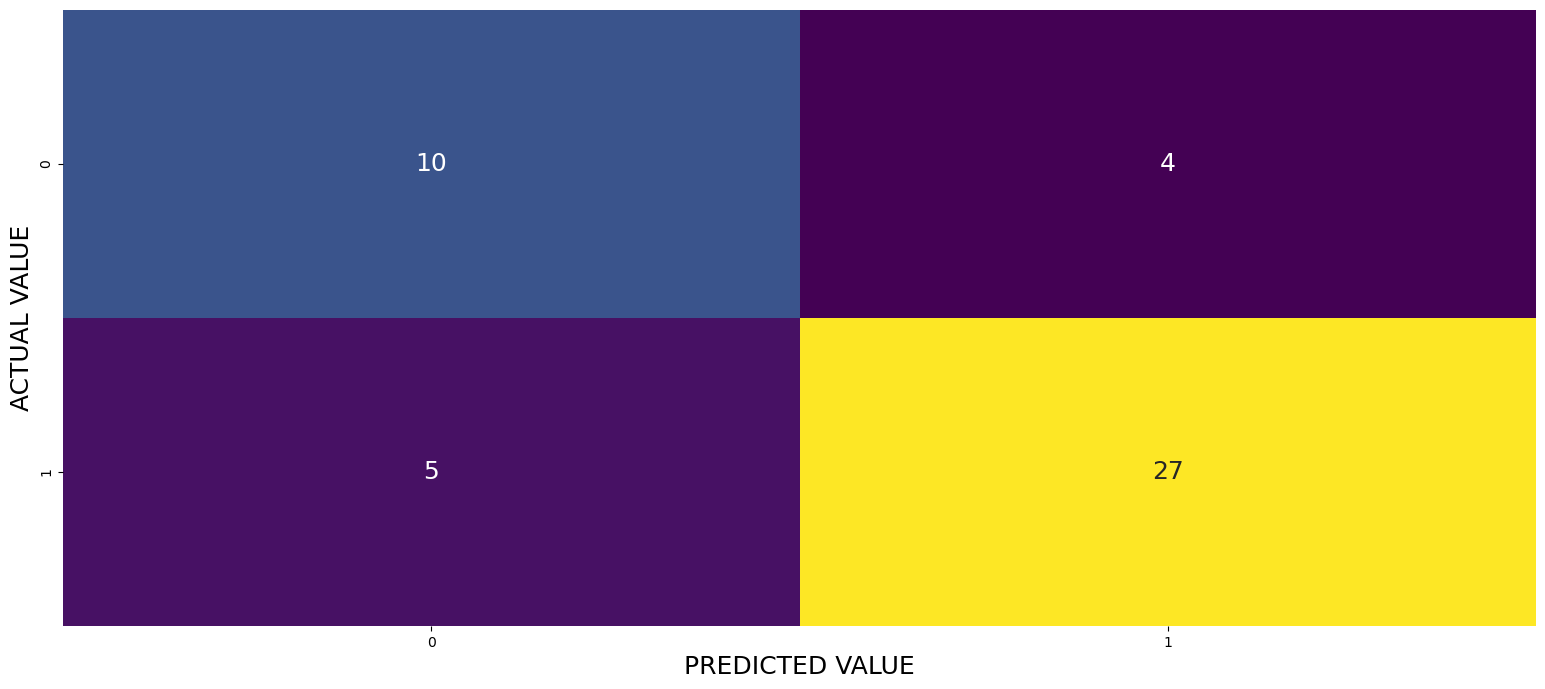

In [65]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, cbar=False, cmap='viridis', annot_kws={"fontsize":18})
#sns.set(font_scale=2) 
plt.xlabel('PREDICTED VALUE', fontsize=18)
plt.ylabel('ACTUAL VALUE', fontsize=18)
plt.show()

In [66]:
accuracy_score(y_test, y_predict)

0.8043478260869565

In [67]:
precision_score(y_test, y_predict)

0.8709677419354839

In [68]:
recall_score(y_test, y_predict)

0.84375

In [69]:
f1_score(y_test, y_predict)

0.8571428571428571

### Multiclass Classification Using Logistic Regression

When the dependent variable has only 2 possible values, it is called Binary Classification.

In Binary Classification, the Machine Learning Model predicts the target variable value as 0 or 1.

When the dependent variable has more than 2 possible values, it is called Multiclass Classification.

In Multiclass Classification, the Machine Learning Model predicts the target variable values as 0, 1, 2, 3, ..., n-1, where n is the number of possible values.

Example: Identifying a numeric digit that is written on a paper by a person. Different people write the same digit in different ways. Hence it is difficult for the computer to identify them.

#### Case Study - Identification of hand written digits

##### About the Dataset

The dataset is present in the Scikit-learn.org

The dataset contains a total of 1797 images, each of 8X8 pixel size.

In [70]:
from sklearn.datasets import load_digits

In [71]:
digits = load_digits()

digits represents a Bunch type of object belonging to utils module of sklearn package.

Bunch object is a dictionary, where the data is stored in the form of key-value pairs.

The data key is an array, containing the images stored in the numerical format.

In [72]:
X = digits.data

In [73]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

The target key contains the actual diigt names for each image.

In [74]:
y = digits.target

In [75]:
y[0]

0

In [76]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

The images key contains 1797 rows, where each row represents an image of 8X8 pixels.

<Figure size 200x200 with 0 Axes>

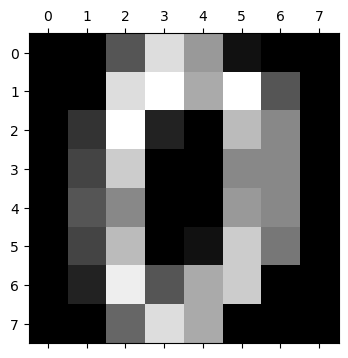

In [77]:
plt.rcParams['figure.figsize'] = [2, 2] 

plt.gray()

plt.matshow(digits.images[0])

plt.show()

##### Data Normalization

In [78]:
X = X/255.0

##### Split the Data into training and test datasets

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

##### Train the model

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
model = LogisticRegression()

In [83]:
model.fit(X_train, y_train)

LogisticRegression()

##### Model Evaluation

In [84]:
model.score(X_train, y_train)

0.8965791567223548

In [85]:
model.score(X_test, y_test)

0.8740740740740741

##### Prediction

In [86]:
y_predict = model.predict(X_test)

##### Confusion Matrix

In [87]:
from sklearn.metrics import confusion_matrix

In [88]:
confusion_matrix = confusion_matrix(y_test, y_predict)

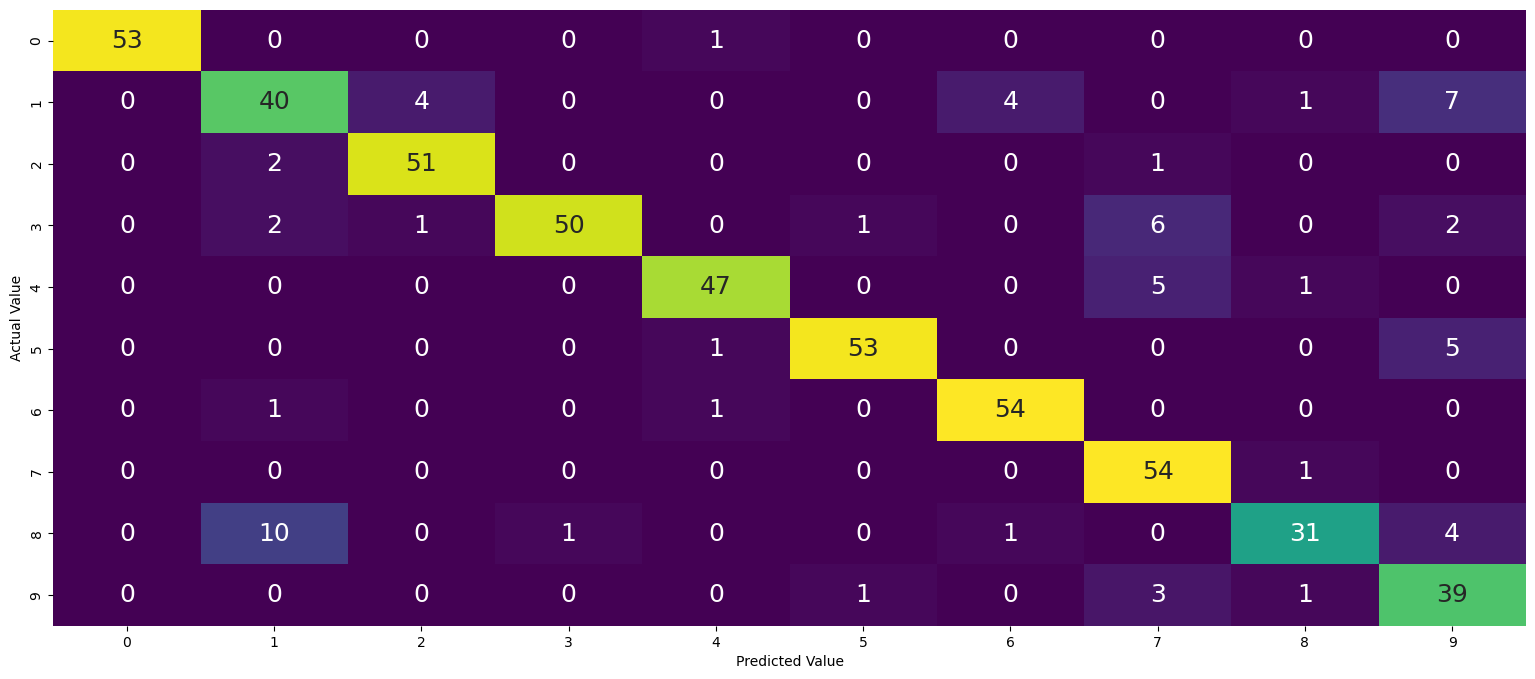

In [89]:
plt.rcParams['figure.figsize'] = [19, 8] 

sns.heatmap(confusion_matrix, annot=True, cmap='viridis', cbar=False, annot_kws={"fontsize":18})

plt.xlabel("Predicted Value")

plt.ylabel("Actual Value")

plt.show()